In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, ParameterGrid, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix
#from pyearth import Earth
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [20]:
data = pd.read_csv('us_used_cars_final.csv')
data.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,5LMCJ2C97HUL71203,36.8 in,SUV / Crossover,Devine,21.0,40,78016,*We have 19 sources of financing and second ch...,I4,2000.0,...,"270 lb-ft @ 3,000 RPM",A,Automatic,t66989,Select FWD,FWD,Front-Wheel Drive,105.9 in,84.1 in,2017
1,1FM5K8D87HGE07214,39.5 in,SUV / Crossover,Buffalo,16.0,9,55313,We are open for business. Purchase your nex...,V6,3500.0,...,"255 lb-ft @ 4,000 RPM",A,6-Speed Automatic,t67141,XLT AWD,AWD,All-Wheel Drive,112.8 in,90.2 in,2017
2,1FMCU0GX6FUA14602,36.8 in,SUV / Crossover,Murfreesboro,23.0,30,37129,CARFAX One-Owner.THIS VEHICLE HAS GONE THROUGH...,I4,2500.0,...,"170 lb-ft @ 4,500 RPM",A,Automatic,t55391,SE FWD,FWD,Front-Wheel Drive,105.9 in,81.8 in,2015
3,WBA4W7C56JAB87837,33.7 in,Coupe,San Rafael,21.0,45,94901,FUEL EFFICIENT 32 MPG Hwy/21 MPG City! CARFAX ...,I6,3000.0,...,"330 lb-ft @ 1,380 RPM",A,8-Speed Automatic,t73244,440i Coupe RWD,RWD,Rear-Wheel Drive,110.6 in,79.4 in,2018
4,SADCL2GX4KA397815,37.2 in,SUV / Crossover,Glen Cove,22.0,319,11542,Santorini Black 2019 Jaguar F-PACE 30t R-Sport...,I4,2000.0,...,"295 lb-ft @ 1,500 RPM",A,8-Speed Automatic,t83299,30t R-Sport AWD,AWD,All-Wheel Drive,113.1 in,85.6 in,2019


In [15]:
data.shape

(6000, 57)

In [16]:
data.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,year
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,21.064333,45.114333,50305.630833,2959.166667,28.460667,249.092167,37.240227,2.779022e+08,-90.394026,45099.504500,1.317667,24568.383500,1066.323500,4.268644,209583.667000,2016.812667
std,4.568115,68.868636,26739.061772,1133.912224,5.460869,82.798315,4.977101,5.683748e+06,13.470080,35797.272393,0.646135,16744.392283,1045.426374,0.500819,130166.298871,2.653943
min,11.000000,0.000000,1020.000000,1000.000000,15.000000,78.000000,25.481300,1.622947e+08,-123.197000,10.000000,1.000000,1680.000000,0.000000,1.000000,41593.000000,1993.000000
25%,17.000000,13.000000,30076.000000,2000.000000,24.000000,180.000000,33.606625,2.772000e+08,-96.763100,22090.750000,1.000000,16500.000000,327.000000,4.030303,60592.000000,2016.000000
50%,21.000000,27.000000,48197.000000,2500.000000,28.000000,248.000000,38.410100,2.792906e+08,-87.470300,34645.000000,1.000000,21924.000000,781.000000,4.347826,276221.000000,2017.000000
75%,25.000000,51.000000,75237.000000,3600.000000,32.000000,295.000000,41.101500,2.806469e+08,-80.826500,56661.250000,1.000000,29995.000000,1499.250000,4.600000,307550.000000,2019.000000
max,70.000000,1365.000000,99362.000000,6600.000000,75.000000,707.000000,48.304300,2.819634e+08,-68.411600,294140.000000,8.000000,859000.000000,12039.000000,5.000000,440352.000000,2020.000000


In [23]:
data.columns

Index(['back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type', 'exterior_color', 'fleet', 'frame_damaged',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'highway_fuel_economy', 'horsepower',
       'interior_color', 'isCab', 'is_new', 'latitude', 'length',
       'listed_date', 'listing_color', 'longitude', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [22]:
# drop columns that are unique
data.drop(columns = ['vin', 'listing_id', 'main_picture_url', 'description'], inplace = True)
data.drop(columns = ['franchise_dealer'], inplace = True)

In [24]:
data.price.describe()

count      6000.000000
mean      24568.383500
std       16744.392283
min        1680.000000
25%       16500.000000
50%       21924.000000
75%       29995.000000
max      859000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

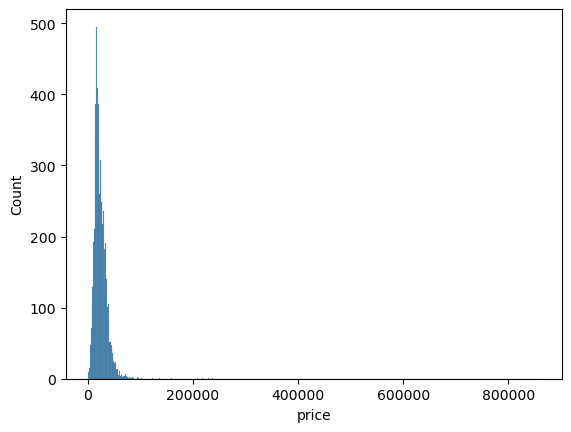

In [29]:
sns.histplot(data=data, x='price')

<AxesSubplot:ylabel='price'>

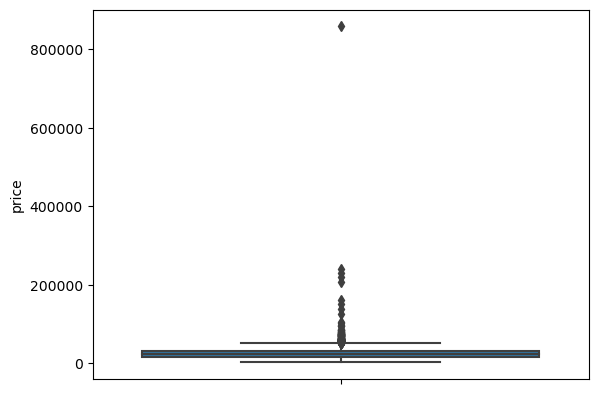

In [30]:
sns.boxplot(data=data, y='price')

In [32]:
# dropping extreme outlier
data.drop(data.price.idxmax(), inplace=True)

<AxesSubplot:ylabel='price'>

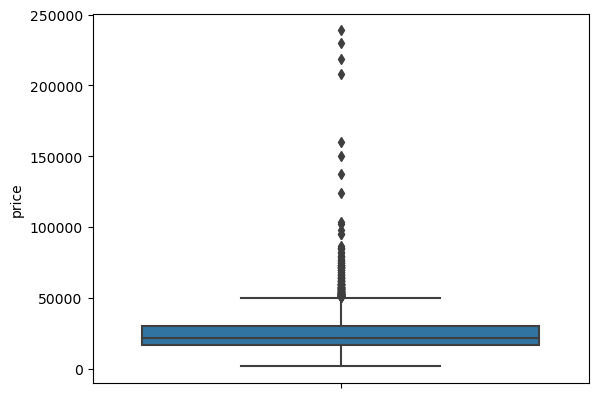

In [34]:
sns.boxplot(data=data, y='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

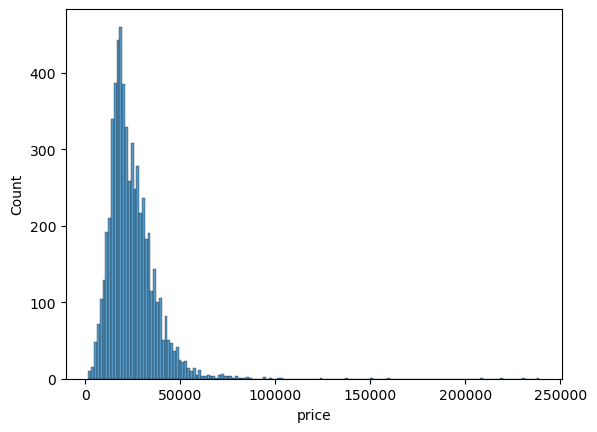

In [35]:
sns.histplot(data=data, x='price')

Keeping other outliers for now, as most are tree based models that aren't heavily influenced by outliers

### Feature engineering
(Hiba)

In [57]:
# map 
print(data.wheel_system.unique())
print(data.transmission.unique())

['FWD' 'AWD' 'RWD' '4WD' '4X2']
['A' 'CVT' 'M' 'Dual Clutch']


In [58]:
bool_cols = data.dtypes[data.dtypes == bool]

In [59]:
bool_cols = pd.DataFrame(bool_cols).reset_index()
bool_cols = bool_cols['index']
bool_cols = list(bool_cols)
bool_cols

['fleet',
 'frame_damaged',
 'has_accidents',
 'isCab',
 'is_new',
 'salvage',
 'theft_title']

In [60]:
for col in bool_cols:
    data[col] = data[col].map({False: 0, True: 1})

In [61]:
cols_map = []
for c in data.columns:
    col_len = (len(data[c].unique()))
    if col_len <=5:
        cols_map.append(c)
[cols_map.remove(c) for c in bool_cols]

[None, None, None, None, None, None, None]

In [62]:
cols_map

['fuel_type', 'transmission', 'wheel_system', 'wheel_system_display']

In [63]:
# # use label encoder
le = LabelEncoder()

encoder_dict = {key: None for key in cols_map}
for c in cols_map:
    encoder_dict[c] = data[c].unique()
    col_name = str(c)+"_cat"
    data[col_name] = le.fit_transform(data[c])
    encoder_dict[col_name] = le.fit_transform(encoder_dict[c])

In [64]:
encoder_dict

{'fuel_type': array(['Gasoline', 'Diesel', 'Flex Fuel Vehicle', 'Biodiesel', 'Hybrid'],
       dtype=object),
 'transmission': array(['A', 'CVT', 'M', 'Dual Clutch'], dtype=object),
 'wheel_system': array(['FWD', 'AWD', 'RWD', '4WD', '4X2'], dtype=object),
 'wheel_system_display': array(['Front-Wheel Drive', 'All-Wheel Drive', 'Rear-Wheel Drive',
        'Four-Wheel Drive', '4X2'], dtype=object),
 'fuel_type_cat': array([3, 1, 2, 0, 4]),
 'transmission_cat': array([0, 1, 3, 2]),
 'wheel_system_cat': array([3, 2, 4, 0, 1]),
 'wheel_system_display_cat': array([3, 1, 4, 2, 0])}

In [65]:
# back_legroom, wheelbase, width, front_legroom,, height,  length, maximum_seating, fuel_tank_volume,
# power, torque

data['back_legroom'] = data['back_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['front_legroom'] = data['front_legroom'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['width'] = data['width'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['height'] = data['height'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['length'] = data['length'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['wheelbase'] = data['wheelbase'].map(lambda x: x.lstrip('+-').rstrip('in'))
data['maximum_seating'] = data['maximum_seating'].map(lambda x: x.lstrip('+-').rstrip('seating'))
data['fuel_tank_volume'] = data['fuel_tank_volume'].map(lambda x: x.lstrip('+-').rstrip('gal'))
# power and torque
data['power'] = data['power'].str[:3]
data['torque'] = data['torque'].str[:3]
data.power = pd.to_numeric(data.power)
data.back_legroom = pd.to_numeric(data.back_legroom)
data.front_legroom = pd.to_numeric(data.front_legroom)
data.width = pd.to_numeric(data.width)
data.height = pd.to_numeric(data.height)
data.length = pd.to_numeric(data.length)
data.wheelbase = pd.to_numeric(data.wheelbase)
data.maximum_seating = pd.to_numeric(data.maximum_seating)
data.fuel_tank_volume = pd.to_numeric(data.fuel_tank_volume)
data.torque = pd.to_numeric(data.torque)

In [66]:
corrs = data.corr()

<AxesSubplot:>

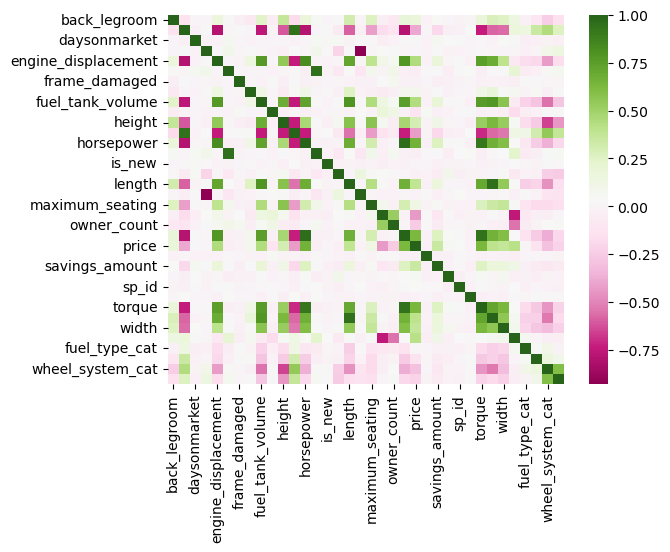

In [69]:
sns.heatmap(corrs, cmap="PiYG")

In [68]:
abs(corrs['price']).sort_values(ascending=False)

price                       1.000000
horsepower                  0.654079
torque                      0.632233
power                       0.629803
engine_displacement         0.445707
fuel_tank_volume            0.438692
mileage                     0.436146
highway_fuel_economy        0.426082
year                        0.414527
wheelbase                   0.403409
city_fuel_economy           0.391876
length                      0.384349
width                       0.373000
savings_amount              0.350888
height                      0.301968
wheel_system_cat            0.301652
owner_count                 0.252056
wheel_system_display_cat    0.213857
back_legroom                0.184594
transmission_cat            0.131790
maximum_seating             0.130443
has_accidents               0.125437
front_legroom               0.087703
seller_rating               0.064576
fleet                       0.054108
sp_id                       0.041053
isCab                       0.036921
l

Some variables that have a high correlation with `price` are `horsepower`,`torque`, `engine_displacement`, `mileage`, `highway_fuel_economy`, `year`, `wheelbase`, `city_fuel_economy`.

`highway_fuel_economy` and `city_fuel_economy` can be combined as `fuel_economy`.

In [53]:
data.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,...,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,36.8 in,SUV / Crossover,Devine,21.0,40,78016,I4,2000.0,I4,Burgundy Velvet Metallic Tinted Clearcoat,...,"270 lb-ft @ 3,000 RPM",A,Automatic,t66989,Select FWD,FWD,Front-Wheel Drive,105.9 in,84.1 in,2017
1,39.5 in,SUV / Crossover,Buffalo,16.0,9,55313,V6,3500.0,V6,Smoked Quartz Metallic Tinted Clearcoat,...,"255 lb-ft @ 4,000 RPM",A,6-Speed Automatic,t67141,XLT AWD,AWD,All-Wheel Drive,112.8 in,90.2 in,2017
2,36.8 in,SUV / Crossover,Murfreesboro,23.0,30,37129,I4,2500.0,I4,Sunset,...,"170 lb-ft @ 4,500 RPM",A,Automatic,t55391,SE FWD,FWD,Front-Wheel Drive,105.9 in,81.8 in,2015
3,33.7 in,Coupe,San Rafael,21.0,45,94901,I6,3000.0,I6,Mineral Grey Metallic,...,"330 lb-ft @ 1,380 RPM",A,8-Speed Automatic,t73244,440i Coupe RWD,RWD,Rear-Wheel Drive,110.6 in,79.4 in,2018
4,37.2 in,SUV / Crossover,Glen Cove,22.0,319,11542,I4,2000.0,I4,Santorini Black,...,"295 lb-ft @ 1,500 RPM",A,8-Speed Automatic,t83299,30t R-Sport AWD,AWD,All-Wheel Drive,113.1 in,85.6 in,2019


In [56]:
data.select_dtypes(include='object').head()

,back_legroom,body_type,city,engine_cylinders,engine_type,exterior_color,franchise_make,front_legroom,fuel_tank_volume,fuel_type,...,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
0,36.8 in,SUV / Crossover,Devine,I4,I4,Burgundy Velvet Metallic Tinted Clearcoat,Ford,42.8 in,15.5 gal,Gasoline,...,Chaparral Ford Inc.,"270 lb-ft @ 3,000 RPM",A,Automatic,t66989,Select FWD,FWD,Front-Wheel Drive,105.9 in,84.1 in
1,39.5 in,SUV / Crossover,Buffalo,V6,V6,Smoked Quartz Metallic Tinted Clearcoat,Ford,42.9 in,18.6 gal,Gasoline,...,Morrie's Buffalo Ford,"255 lb-ft @ 4,000 RPM",A,6-Speed Automatic,t67141,XLT AWD,AWD,All-Wheel Drive,112.8 in,90.2 in
2,36.8 in,SUV / Crossover,Murfreesboro,I4,I4,Sunset,Ford,43.1 in,15.4 gal,Gasoline,...,Ford of Murfreesboro,"170 lb-ft @ 4,500 RPM",A,Automatic,t55391,SE FWD,FWD,Front-Wheel Drive,105.9 in,81.8 in
3,33.7 in,Coupe,San Rafael,I6,I6,Mineral Grey Metallic,BMW,42.2 in,15.8 gal,Gasoline,...,BMW of San Rafael,"330 lb-ft @ 1,380 RPM",A,8-Speed Automatic,t73244,440i Coupe RWD,RWD,Rear-Wheel Drive,110.6 in,79.4 in
4,37.2 in,SUV / Crossover,Glen Cove,I4,I4,Santorini Black,Jaguar,40.3 in,21.7 gal,Gasoline,...,Jaguar Land Rover Glen Cove,"295 lb-ft @ 1,500 RPM",A,8-Speed Automatic,t83299,30t R-Sport AWD,AWD,All-Wheel Drive,113.1 in,85.6 in


In [71]:
data.trim_name.nunique()

1158

In [72]:
data.model_name.nunique()

360